## Import Libraries

In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

%matplotlib inline

## Load the Data

In [2]:
df = pd.read_csv("Data\Final_data2.csv")

In [3]:
grouped_df = df.groupby("position_encoded")

In [4]:
df.shape

(10754, 29)

In [5]:
df.head(2)

,Unnamed: 0,team,name,position,height,age,appearance,goals per 90,assists per 90,yellow cards per 90,...,highest_value,position_encoded,winger,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets
0,0,Manchester United,David de Gea,Goalkeeper,189.0,32,104,0.0,0.0,0.009585,...,70000000,1,0,0,0,1,0,0,127,35
1,1,Manchester United,Jack Butland,Goalkeeper,196.0,30,15,0.0,0.0,0.069018,...,22000000,1,0,0,0,1,0,0,18,3


## Preprocess the Data

#### 1. Simple EDA + Data Quality checking

In [6]:
# uniqeness
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,Unnamed: 0,team,name,position,height,age,appearance,goals per 90,assists per 90,yellow cards per 90,...,highest_value,position_encoded,winger,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets


In [7]:
# Completeness
df.isnull().sum()

Unnamed: 0                    0
team                          0
name                          0
position                      0
height                        0
age                           0
appearance                    0
goals per 90                  0
assists per 90                0
yellow cards per 90           0
second yellow cards per 90    0
red cards per 90              0
goals conceded per 90         0
clean sheets per 90           0
minutes played                0
days_injured                  0
games_injured                 0
award                         0
current_value                 0
highest_value                 0
position_encoded              0
winger                        0
goals                         0
assists                       0
yellow cards                  0
second yellow cards           0
red cards                     0
goals conceded                0
clean sheets                  0
dtype: int64

In [8]:
# Accurecy types
df.dtypes

Unnamed: 0                      int64
team                           object
name                           object
position                       object
height                        float64
age                             int64
appearance                      int64
goals per 90                  float64
assists per 90                float64
yellow cards per 90           float64
second yellow cards per 90    float64
red cards per 90              float64
goals conceded per 90         float64
clean sheets per 90           float64
minutes played                  int64
days_injured                    int64
games_injured                   int64
award                           int64
current_value                   int64
highest_value                   int64
position_encoded                int64
winger                          int64
goals                           int64
assists                         int64
yellow cards                    int64
second yellow cards             int64
red cards   

In [9]:
# Accurecy - Outlier

# Convert categorical variables using OneHotEncoding
categorical_features = ['team', 'name']
numeric_features = ['height', 'age', 'appearance','goals','assists','yellow cards',
                    'second yellow cards','red cards','goals conceded','clean sheets','award',
                    'games_injured','days_injured','minutes played']

In [10]:
for i in categorical_features:
    print (df[i].value_counts())

team
Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    46
FC Seoul                  45
Gangwon FC                43
Daegu FC                  42
                          ..
FC Barcelona              22
Atlético de Madrid        22
CA Osasuna                22
Hatayspor                 12
Gaziantep FK               6
Name: count, Length: 374, dtype: int64
name
Paulinho              6
Vitinho               5
Guilherme             5
Fernando              4
João Pedro            4
                     ..
Everson               1
Matheus Mendes        1
Gabriel Delfim        1
Nathan Silva          1
Alexander Badolato    1
Name: count, Length: 10584, dtype: int64


(array([  17.,   81.,  672., 1655., 2459., 2882., 1961.,  871.,  147.,
           9.]),
 array([156., 161., 166., 171., 176., 181., 186., 191., 196., 201., 206.]),
 <BarContainer object of 10 artists>)

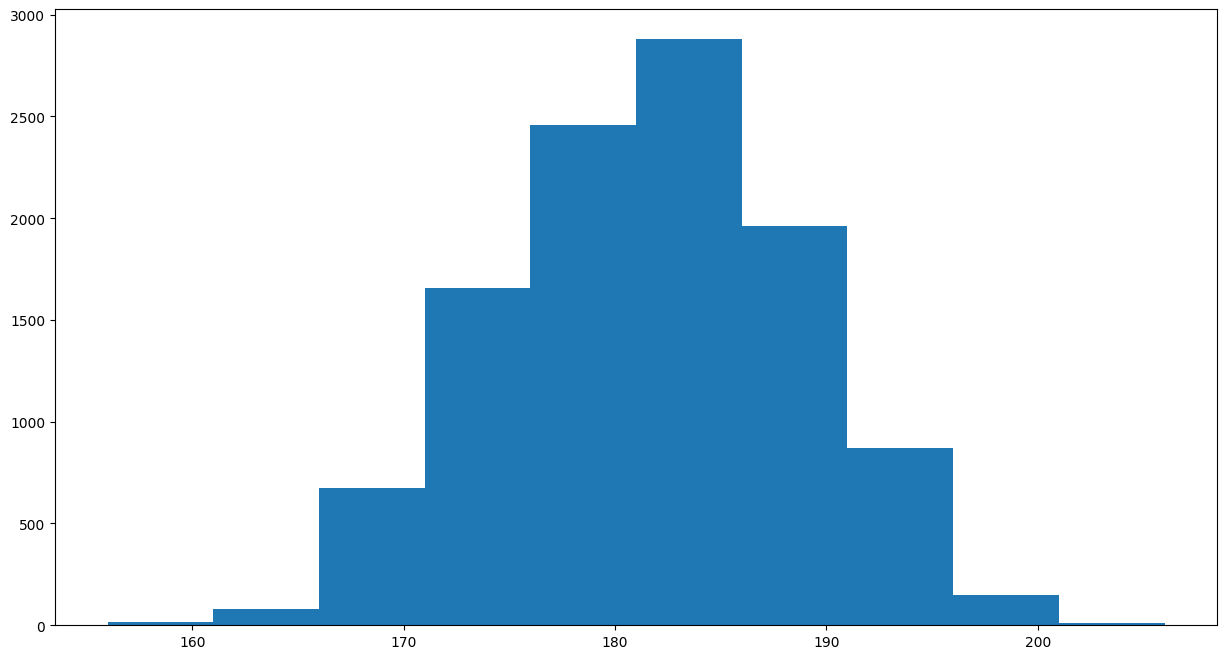

In [11]:
plt.figure(figsize=(15,8))
plt.hist(df['height'])

(array([ 105.,  635., 2157., 1590., 1599., 1994., 1101., 1068.,  326.,
         146.]),
 array([15. , 17.4, 19.8, 22.2, 24.6, 27. , 29.4, 31.8, 34.2, 36.6, 39. ]),
 <BarContainer object of 10 artists>)

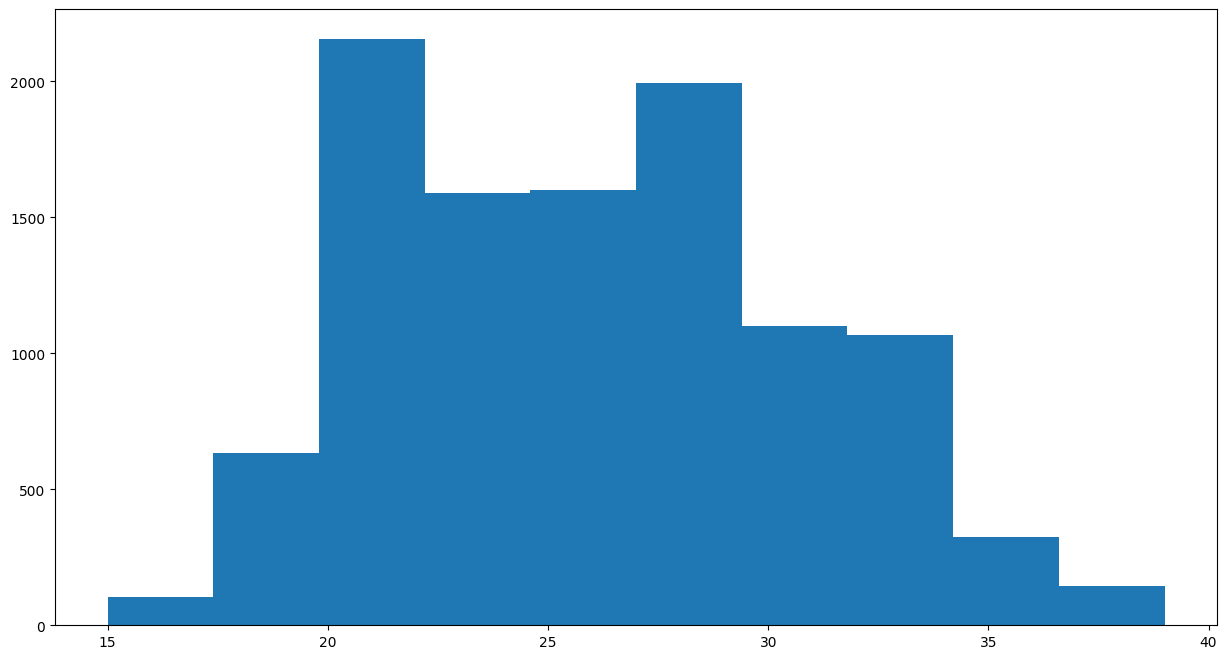

In [12]:
plt.figure(figsize=(15,8))
plt.hist(df[df['age']<40]['age'])


In [13]:
df = df[df['age']<40]

In [14]:
df.shape

(10721, 29)

(array([2262., 1738.,  837.,  969., 1130., 1222., 1179.,  813.,  376.,
         161.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

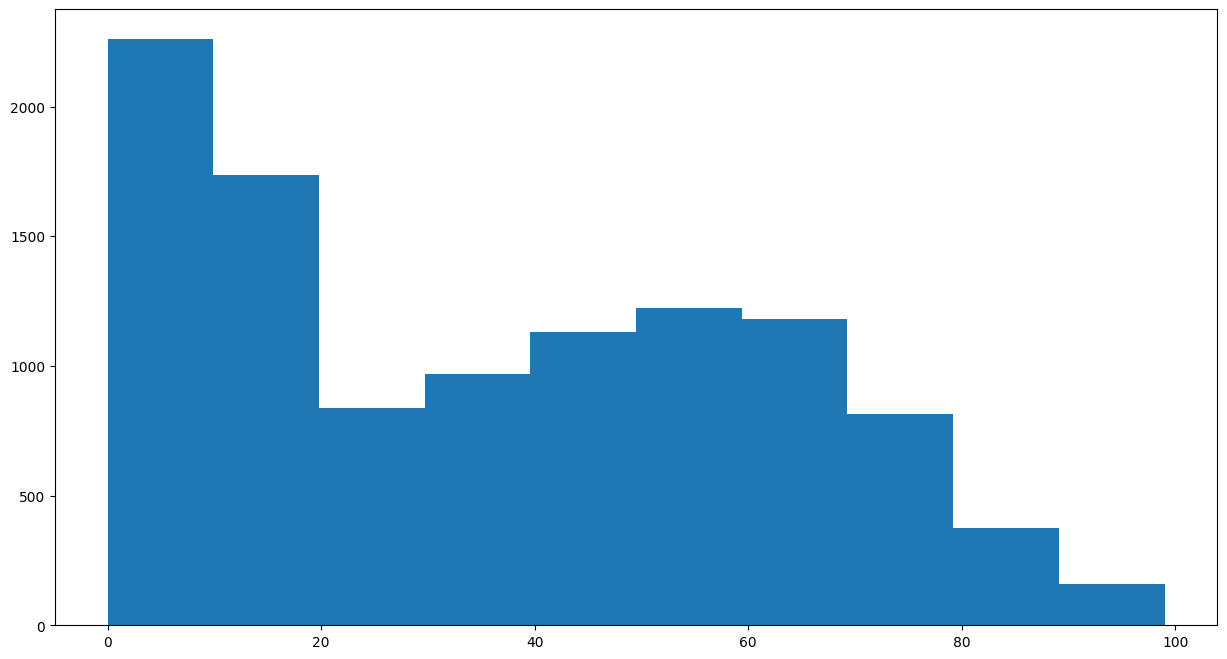

In [15]:
plt.figure(figsize=(15,8))
plt.hist(df[df['appearance']<100]["appearance"])

In [16]:
df = df[df["appearance"]<100]

In [17]:
df.shape

(10687, 29)

(array([5855., 1705.,  951.,  543.,  378.,  270.,  198.,  171.,  127.,
          93.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <BarContainer object of 10 artists>)

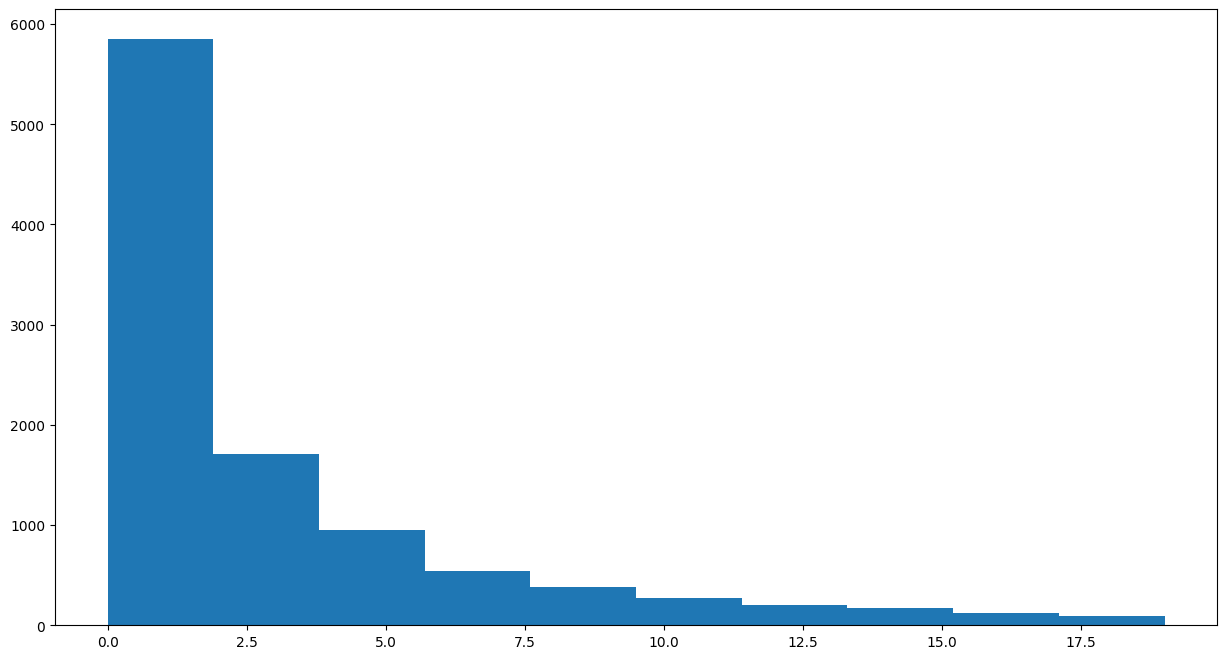

In [18]:
plt.figure(figsize=(15,8))
plt.hist(df[df['goals']<20]["goals"])

In [19]:
df = df[df["goals"]<20]

In [20]:
df.shape

(10291, 29)

(array([6143., 1087.,  690.,  552.,  392.,  281.,  273.,  196.,  154.,
         208.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

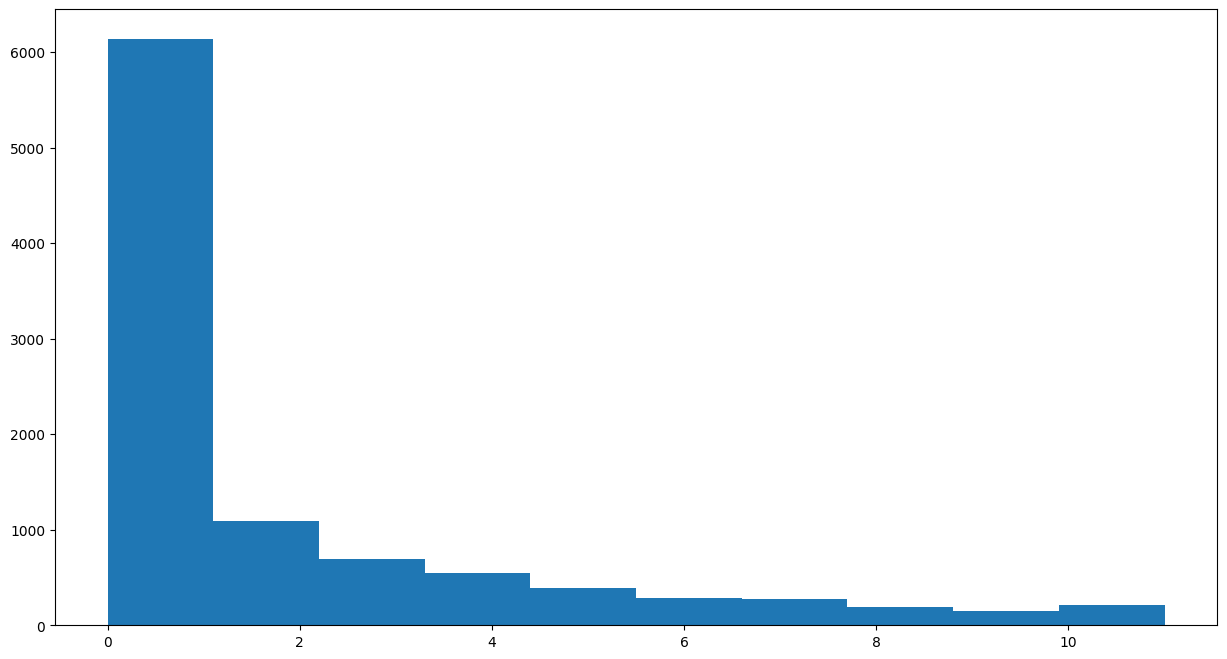

In [21]:
plt.figure(figsize=(15,8))
plt.hist(df[df['assists']<12]["assists"])

In [22]:
df = df[df['assists']<12]

In [23]:
df.shape

(9976, 29)

(array([3564., 1868., 1307.,  955.,  751.,  530.,  389.,  254.,  148.,
         126.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

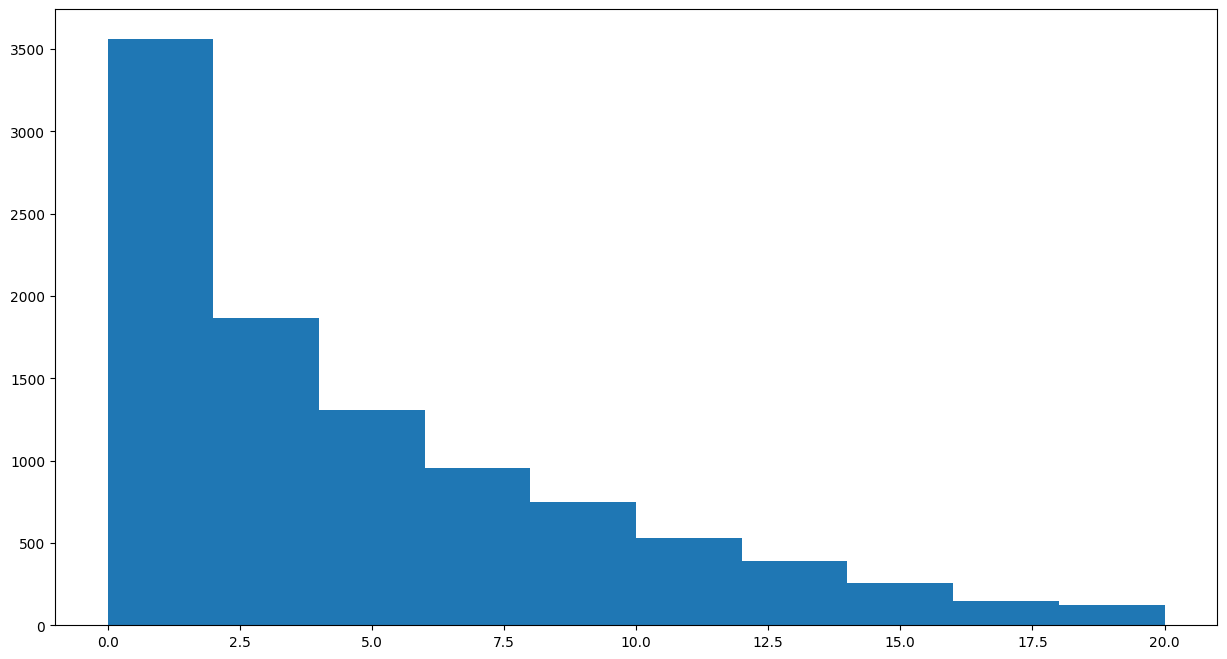

In [24]:
plt.figure(figsize=(15,8))
plt.hist(df[df['yellow cards']<=20]["yellow cards"])

In [25]:
df = df[df['yellow cards']<=20]

In [26]:
df.shape

(9892, 29)

In [27]:
df['second yellow cards'].value_counts()

second yellow cards
0    8892
1     887
2     100
3      12
4       1
Name: count, dtype: int64

In [28]:
df = df[df["second yellow cards"]<3]

In [29]:
df['red cards'].value_counts()

red cards
0    8720
1    1007
2     137
3      12
4       3
Name: count, dtype: int64

In [30]:
df = df[df["red cards"]<3]

(array([4580., 2069., 1098.,  643.,    0.,  391.,  272.,  173.,  166.,
          96.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

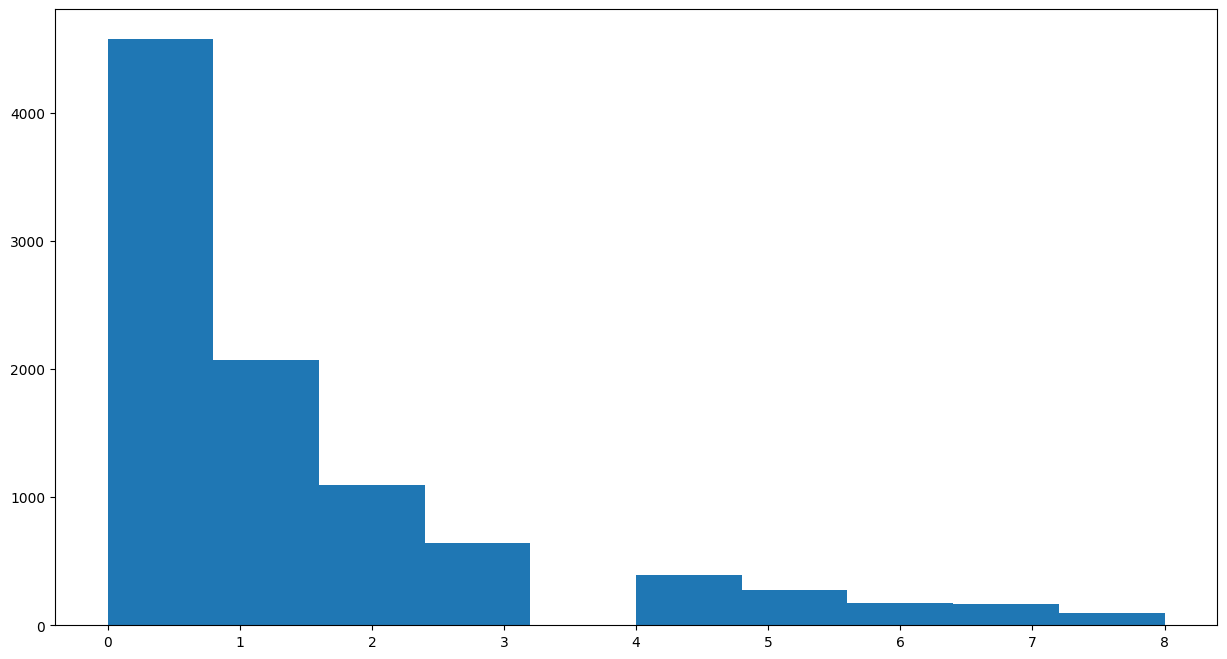

In [31]:
plt.figure(figsize=(15,8))
plt.hist(df[df["award"]<9]["award"])

In [32]:
df = df[df['award']<9]

(array([5758., 1127.,  708.,  652.,  392.,  268.,  168.,  132.,   82.,
          75.]),
 array([  0. ,  69.7, 139.4, 209.1, 278.8, 348.5, 418.2, 487.9, 557.6,
        627.3, 697. ]),
 <BarContainer object of 10 artists>)

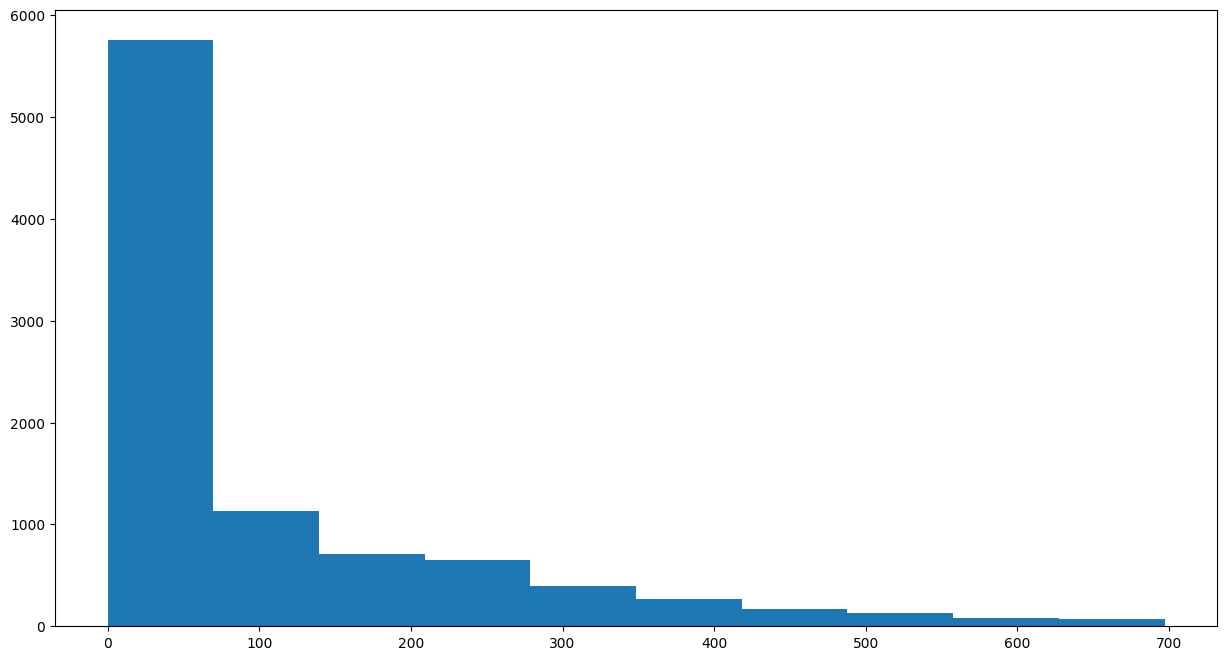

In [33]:
plt.figure(figsize=(15,8))
plt.hist(df[df["days_injured"]<=700]["days_injured"])

In [34]:
df = df[df["days_injured"]<=700]

(array([5304., 1041.,  749.,  544.,  425.,  347.,  275.,  219.,  156.,
          94.]),
 array([ 0. ,  6.9, 13.8, 20.7, 27.6, 34.5, 41.4, 48.3, 55.2, 62.1, 69. ]),
 <BarContainer object of 10 artists>)

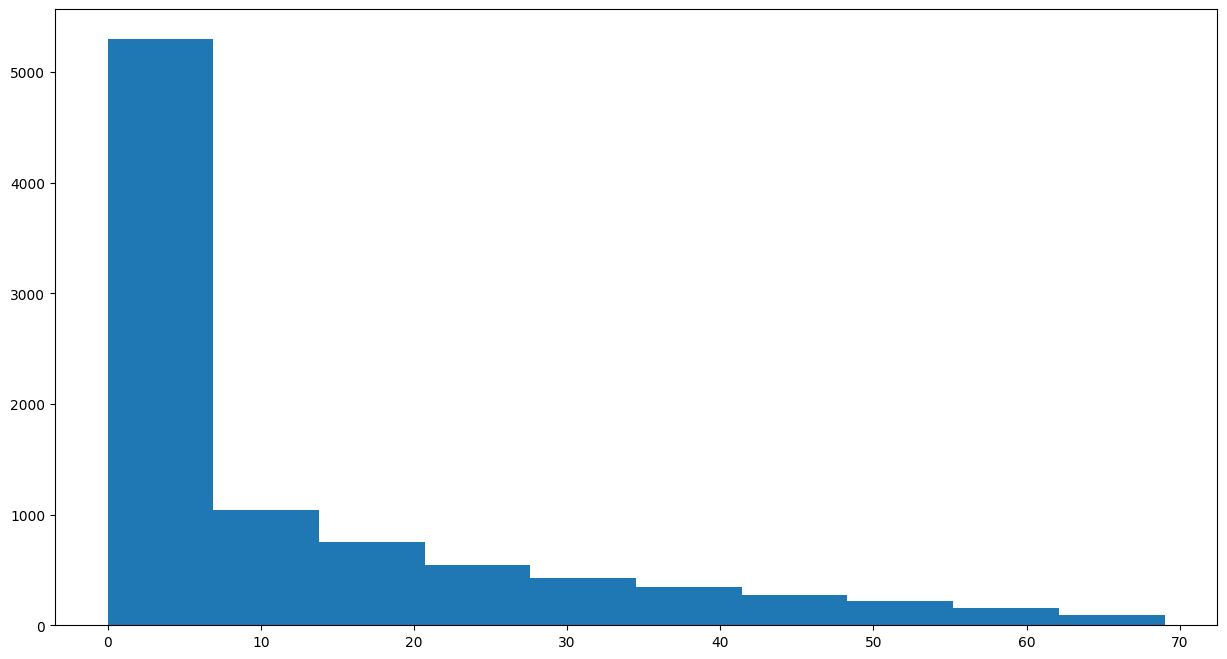

In [35]:
plt.figure(figsize=(15,8))
plt.hist(df[df['games_injured']<70]["games_injured"])

In [36]:
df = df[df['games_injured']<70]

(array([2836., 1536., 1044., 1060.,  862.,  760.,  536.,  266.,  177.,
          64.]),
 array([   0. ,  793.2, 1586.4, 2379.6, 3172.8, 3966. , 4759.2, 5552.4,
        6345.6, 7138.8, 7932. ]),
 <BarContainer object of 10 artists>)

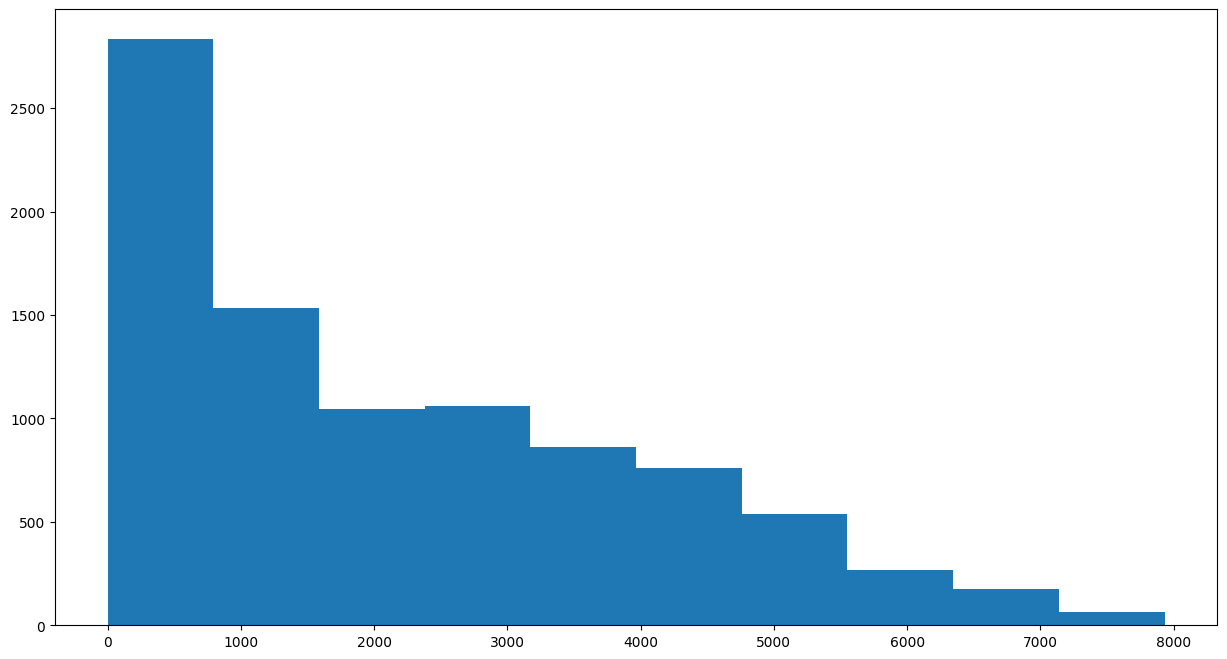

In [37]:
plt.figure(figsize=(15,8))
plt.hist(df[df["minutes played"]<8000]["minutes played"])

In [38]:
df = df[df["minutes played"]<8000]

In [39]:
df.columns

Index(['Unnamed: 0', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals per 90', 'assists per 90', 'yellow cards per 90',
       'second yellow cards per 90', 'red cards per 90',
       'goals conceded per 90', 'clean sheets per 90', 'minutes played',
       'days_injured', 'games_injured', 'award', 'current_value',
       'highest_value', 'position_encoded', 'winger', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets'],
      dtype='object')

In [40]:
df = df.drop(['Unnamed: 0','goals per 90','assists per 90','yellow cards per 90','second yellow cards per 90',
         'red cards per 90','goals conceded per 90','clean sheets per 90'], axis=1)

In [41]:
df = df.drop(['position'],axis=1)

In [42]:
df.columns

Index(['team', 'name', 'height', 'age', 'appearance', 'minutes played',
       'days_injured', 'games_injured', 'award', 'current_value',
       'highest_value', 'position_encoded', 'winger', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets'],
      dtype='object')

In [43]:
df.shape

(9141, 20)

#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [44]:
df.head(2)

,team,name,height,age,appearance,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets
1,Manchester United,Jack Butland,196.0,30,15,1304,510,58,1,1500000,22000000,1,0,0,0,1,0,0,18,3
5,Manchester United,Harry Maguire,194.0,30,68,4762,148,27,1,25000000,70000000,2,0,2,0,16,1,0,0,0


In [45]:
categorical_features

['team', 'name']

In [46]:
# one hot coding
df = pd.get_dummies(df, columns=categorical_features)

In [47]:
df.shape

(9141, 9420)

In [48]:
df.head(2)

,height,age,appearance,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,...,name_Óscar Plano,name_Óscar Rodríguez,name_Óscar Romero,name_Óscar Villa,name_Óscar de Marcos,name_Ömer Ali Sahiner,name_Ömer Beyaz,name_Ömer Toprak,name_Örjan Nyland,name_Ümit Akdag
1,196.0,30,15,1304,510,58,1,1500000,22000000,1,...,False,False,False,False,False,False,False,False,False,False
5,194.0,30,68,4762,148,27,1,25000000,70000000,2,...,False,False,False,False,False,False,False,False,False,False


#### 3. Feature selection

In [ ]:
#sns.heatmap(df.corr(), annot=True);

In [49]:
correlation = df.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value                1.000000
highest_value                0.854368
appearance                   0.393331
minutes played               0.391131
assists                      0.296799
                               ...   
team_Marumo Gallants FC     -0.027297
team_Al-Batin FC            -0.027395
team_Royal AM FC            -0.027522
team_Daejeon Hana Citizen   -0.028249
age                         -0.065719
Name: current_value, Length: 9420, dtype: float64


In [50]:
# Set the correlation threshold
threshold = 0.28  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['appearance', 'minutes played', 'current_value', 'highest_value',
       'assists', 'yellow cards'],
      dtype='object')

In [51]:
selected_features = ['appearance', 'minutes played', 'current_value',
                     'highest_value', 'assists', 'yellow cards']

In [52]:
df = df[selected_features]
df.head()

,appearance,minutes played,current_value,highest_value,assists,yellow cards
1,15,1304,1500000,22000000,0,1
5,68,4762,25000000,70000000,0,16
8,34,2758,2000000,2000000,0,4
10,89,7132,22000000,22000000,5,18
11,34,2686,10000000,12000000,1,10


#### 4. Prepare train and test data

In [70]:
# Prepare data
X = df.drop(['current_value'], axis=1)
y = df['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=43)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Buliding the Model

In [71]:
model = LinearRegression()

In [ ]:
# ridge_model = Ridge(alpha=1.0)  # You can adjust alpha to see different resu

In [ ]:
# lasso_model = Lasso(alpha=0.1)  # You can adjust alpha to see different results

In [ ]:
# param_grid = {
#     'alpha': [0.1, 1, 10, 100, 1000]  # Regularization strength
# }
# grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

## Train the Model

In [72]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# ridge_model.fit(X_train_scaled, y_train)

In [ ]:
#lasso_model.fit(X_train_scaled, y_train)

In [ ]:
# grid_search.fit(X_train_scaled, y_train)

## Test the Model

In [73]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

In [ ]:
# y_pred_ridge = ridge_model.predict(X_test_scaled)

In [ ]:
# y_pred_lasso = lasso_model.predict(X_test_scaled)

In [ ]:
# # Best hyperparameter
# print("Best parameters found: ", grid_search.best_params_)

# # Best model
# best_ridge = grid_search.best_estimator_

In [ ]:
# y_pred_ridge_cv = best_ridge.predict(X_test_scaled)

## Interpretation of the Model

In [74]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
appearance,-9.323596e+05
minutes played,1.210311e+06
highest_value,4.507600e+06
assists,2.546376e+05
yellow cards,-2.582614e+04


In [75]:
print(model.intercept_) 

2393243.2986870897


## Evaluating the Model 

1. Mean Square Error

In [76]:
y_base = [y_train.mean()] * len(y_test)

In [78]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base}')

Mean Squared Error of base model: 31710550456735.598


In [79]:
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train}')
print(f'Mean Squared Error for testing: {mse_test}')

Mean Squared Error for training: 7649002188081.984
Mean Squared Error for testing: 8448173710537.868


2. Mean Absolute Error

In [80]:
# our benchmark model
mse_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mse_base}')

Mean Absolute  Error of base model: 2889180.056555997


In [63]:
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')

Mean Absolute Error for training: 1262316.1535391074
Mean Absolute Error for testing: 1258294.948395


3. Root Mean Absolute Error

In [81]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base)}')

Root Mean Squared  Error of base model: 1699.7588230557878


In [82]:
print(f'Root Mean Squared Error for training: {np.sqrt(mse_train)}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test)}')

Root Mean Squared Error for training: 2765682.951475455
Root Mean Squared Error for testing: 2906574.22243745


4. R Square

In [83]:
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.7409766610162101
R Square for testing: 0.7333809483786865


#### Predictions vs. Real Values

In [84]:
predictions = model.predict(X_test_scaled)
#predictions

In [85]:
Real_Values = np.array(y_test)
#Real_Values

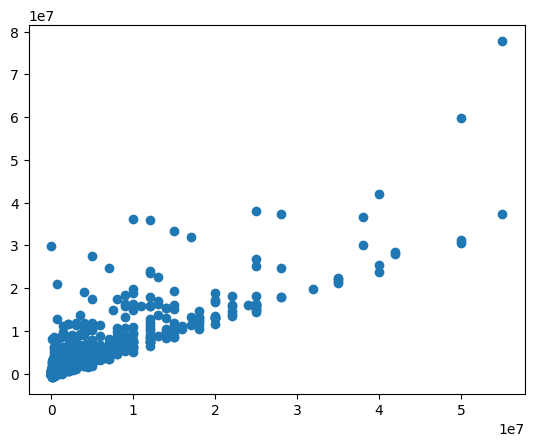

In [86]:
plt.scatter(Real_Values,predictions); 

#### Residual Histogram

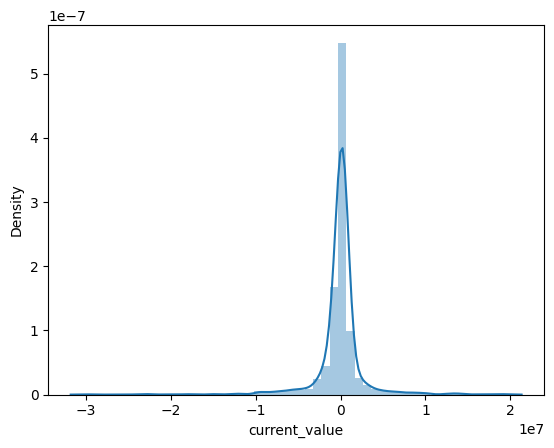

In [87]:
sns.distplot((y_test-predictions),bins=50); # it's good if we get normal distribution